# Türkiye için Küresel Enerji Değerlendirmesi

## Bölüm 6 - Sorular


Barış Sanlı, barissanli2@gmail.com

Enerji verileri için https://www.energyinst.org/statistical-review/resources-and-data-downloads (Narrow - CSV Format) indirin

In [1]:
#!pip install plotnine         # 1. should be sufficient for most
#!pip install 'plotnine[all]'

In [2]:
# font sorunları için
# rebuild font cache https://stackoverflow.com/questions/37920935/matplotlib-cant-find-font-installed-in-my-linux-machine/70647041#70647041
# font install https://techoverflow.net/2024/01/29/how-to-fix-matplotlib-findfont-font-family-xkcd-not-found-on-ubuntu-22-04/
# brew install font-xkbcd

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd


In [4]:
import pandas as pd

In [5]:
#%matplotlib inline

-------------deneme bölgesi--------------

In [6]:
ulkeler=["Turkiye","Total World","Total EU","Total OECD","China","Germany","Total Non-OECD"]
#İtalya ve Meksika, GDP olarak yakın
#İran ve Almanya, nüfus olaarak yakın
ilkyil=1995

In [7]:
#df.Var.unique()

In [8]:
degiskenler=["pop", "GDP","primary_ej","primary_eintensity","elect_twh", "renewables_ej", "ren_power_twh","solar_twh","wind_twh",
             "co2_mtco2","hydro_twh", "coalcons_ej","gascons_ej","oilcons_ej",'electbyfuel_coal','electbyfuel_gas']
            

In [9]:
df=pd.read_csv("merged_narrow.csv")
df.drop(columns=['Region', 'SubRegion',"OPEC","EU","OECD","CIS","ISO3166_alpha3","ISO3166_numeric"], inplace=True)

In [10]:
ds=df[df.Country.isin(ulkeler) & (df.Year>ilkyil) & df.Var.isin(degiskenler)]

In [11]:
dt=ds.pivot_table(index="Year",columns=["Country","Var"],values="Value")

In [12]:
for i in ulkeler:
      dt[i,"GDP"] = dt[i,"primary_ej"]/ dt[i,"primary_eintensity"]

In [13]:
for i in degiskenler:
  dt['Dünya_Çin', i] = dt["Total World",i]-dt["China",i]
  dt['Dünya_Çin_AB', i] = dt["Dünya_Çin",i]-dt["Total EU",i]
  dt['nonEU', i] = dt["Total World",i]-dt["Total EU",i]

In [14]:
liste=dt.columns.get_level_values(0).unique().tolist()
liste

['China',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'Turkiye',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

In [15]:
yazilar=['Çin','Almanya','AB','OECD Dışı','OECD','Dünya','Türkiye','Çin Dışındakiler','Çin ve AB Dışındakiler','AB Dışındakiler']
tercume = {liste[i]: yazilar[i] for i in range(len(liste))}


# Stil

In [16]:
plt.rcdefaults()
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')


#plt.xkcd()

#plt.figure(figsize=(12,6))
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.xkcd()

# Birincil Enerjide Yenilenebilir

In [17]:
#plt.style.available

In [18]:
liste=dt.columns.get_level_values(0).unique().tolist()

In [19]:
liste[0],liste[6]=liste[6],liste[0] # Türkiye Başta olsun

In [20]:
liste

['Turkiye',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'China',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

In [21]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

renewables_ej


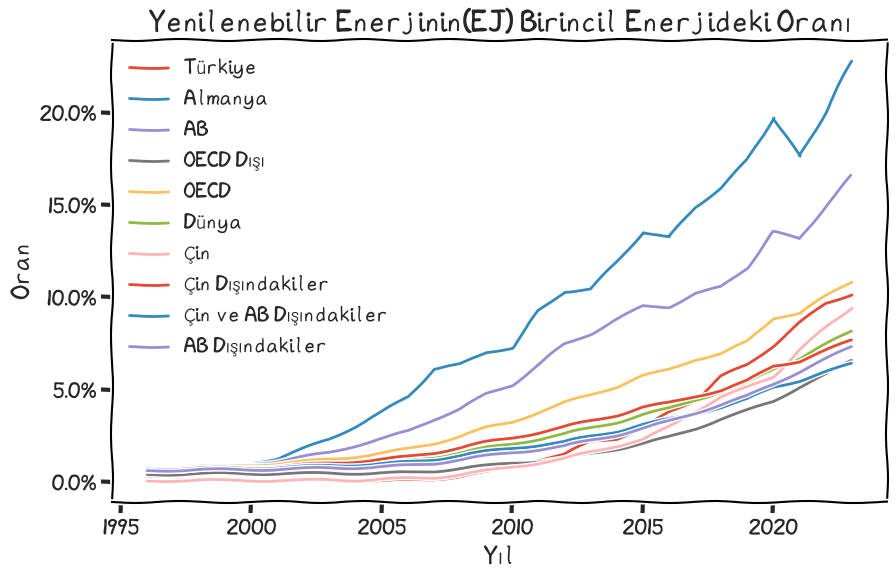

In [22]:

t=5 #renewables_ej
t2=2 #primary_ej
print(degiskenler[t])

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in liste:
    plt.plot(100*dt[i,degiskenler[t]]/dt[i,degiskenler[t2]],label=tercume[i])

"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""
#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Yenilenebilir Enerjinin(EJ) Birincil Enerjideki Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

In [23]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

ren_power_twh
Turkiye 22.58169281027466
Germany 49.21495971087434
Total EU 32.36827211194658
Total Non-OECD 13.111519171273798
Total OECD 20.48983796211081
Total World 15.867741725772914
China 17.64030887945146
Dünya_Çin 15.048808792401365
Dünya_Çin_AB 12.375105708730189
nonEU 14.206464393049995


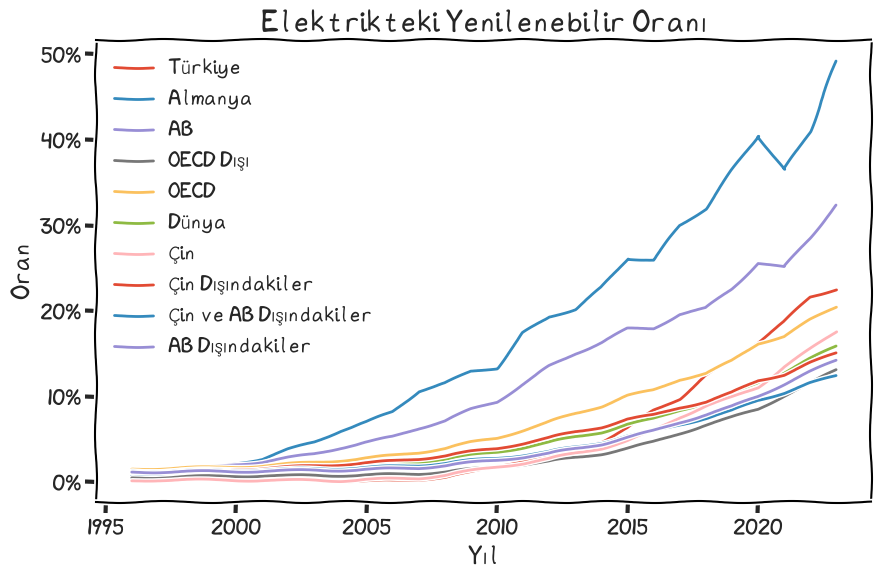

In [24]:
# elektrikteki yenilenebilir oranı
t=6 #ren_power_twh
t2=4 #elect_twh
print(degiskenler[t])

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in liste:
    plt.plot(100*dt[i,degiskenler[t]]/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikteki Yenilenebilir Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in liste:
  print(i, (100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [25]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

ren_power_twh
Turkiye 22.58169281027466
Germany 49.21495971087434
Total EU 32.36827211194658
Total Non-OECD 13.111519171273798
Total OECD 20.48983796211081
Total World 15.867741725772914
China 17.64030887945146
Dünya_Çin 15.048808792401365
Dünya_Çin_AB 12.375105708730189
nonEU 14.206464393049995


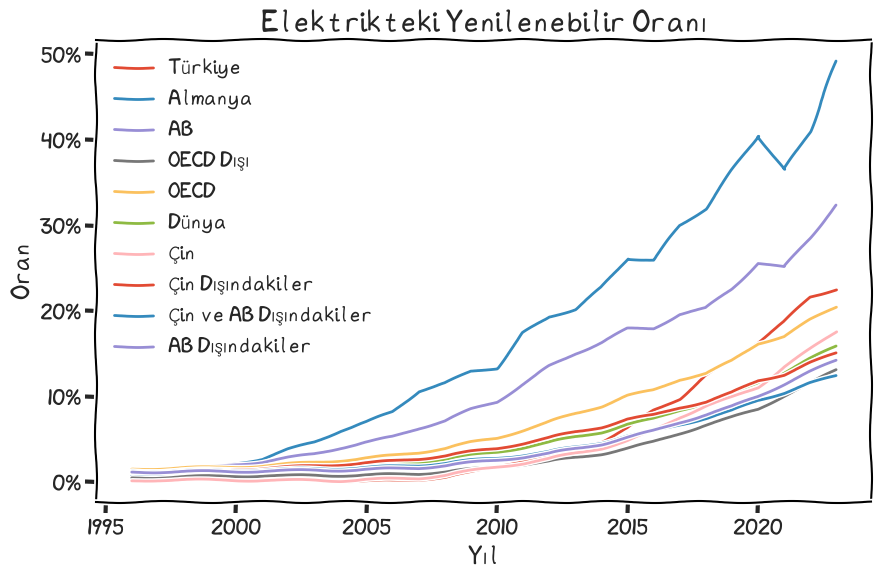

In [26]:
#elektrikteki güneş oranı
t=6 #ren_power_twh
t2=4 #elect_twh
print(degiskenler[t])

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in liste:
    plt.plot(100*dt[i,degiskenler[t]]/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikteki Yenilenebilir Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in liste:
  print(i, (100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [27]:
degiskenler[10]
s_liste=liste

ren_power_twh
Turkiye 42.046605456782096
Germany 53.03811778912228
Total EU 44.26598008492066
Total Non-OECD 28.33874910261182
Total OECD 32.88398683888181
Total World 30.036654428862175
China 30.60497105676132
Dünya_Çin 29.77408993182553
Dünya_Çin_AB 27.5368952407621
nonEU 28.604042529783435


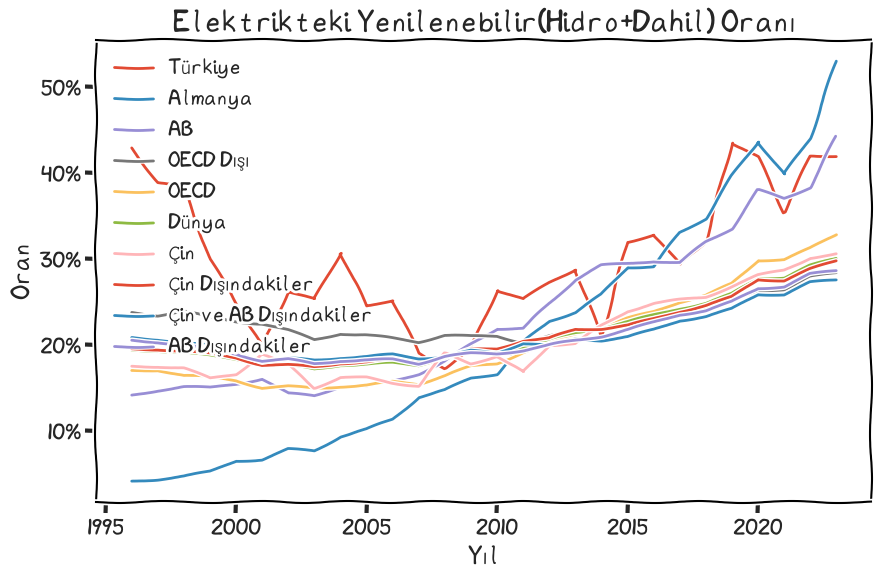

In [28]:
#elektrikteki hidro dahil yenilenebilir oranı
t=6 #ren_power_twh
t2=4 #elect_twh
print(degiskenler[t])

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in liste:
    plt.plot(100*(dt[i,degiskenler[t]]+dt[i,degiskenler[10]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikteki Yenilenebilir(Hidro+Dahil) Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in s_liste:
  print(i, (100*(dt[i,degiskenler[t]]+dt[i,degiskenler[10]])/dt[i,degiskenler[t2]]).values[-1])

In [29]:
degiskenler[7]

'solar_twh'

In [30]:
liste

['Turkiye',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'China',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

solar_twh
Turkiye 6.254844608445628
Germany 11.917024538827118
Total EU 9.03026763009595
Total OECD 6.756214019466795
Total World 5.48568179988851
China 6.17727178515382
Dünya_Çin_AB 4.569641176034758


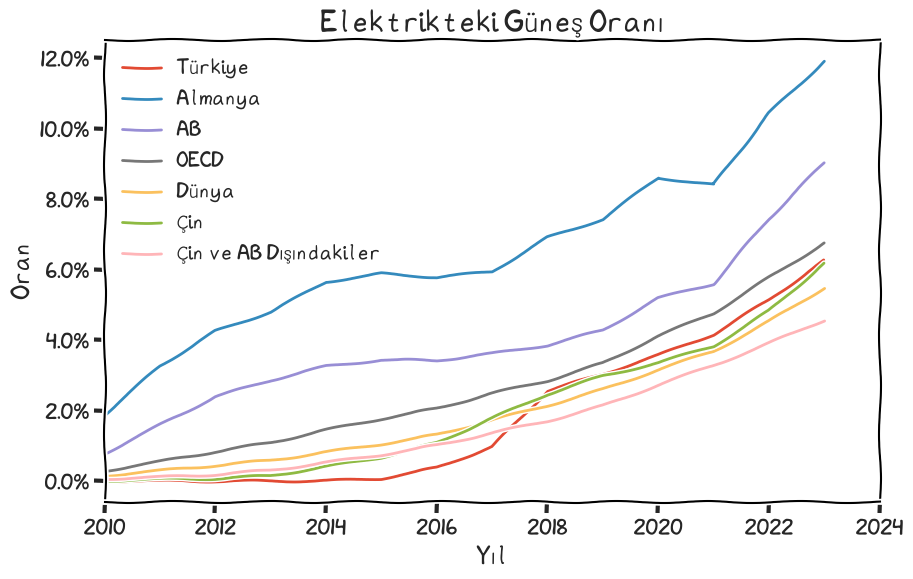

In [31]:
#elektrikteki güneş oranı
t=7 #ren_power_twh
t2=4 #elect_twh
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,1,2,4,5,6,8] ]

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikteki Güneş Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.xlim(2010,2024)

for i in s_liste:
  print(i, (100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

hydro_twh
Turkiye 19.46491264650743
Total EU 11.897707972974084
Total Non-OECD 15.227229931338025
Total World 14.168912703089259
Dünya_Çin 14.725281139424167
Dünya_Çin_AB 15.16178953203191
nonEU 14.397578136733442


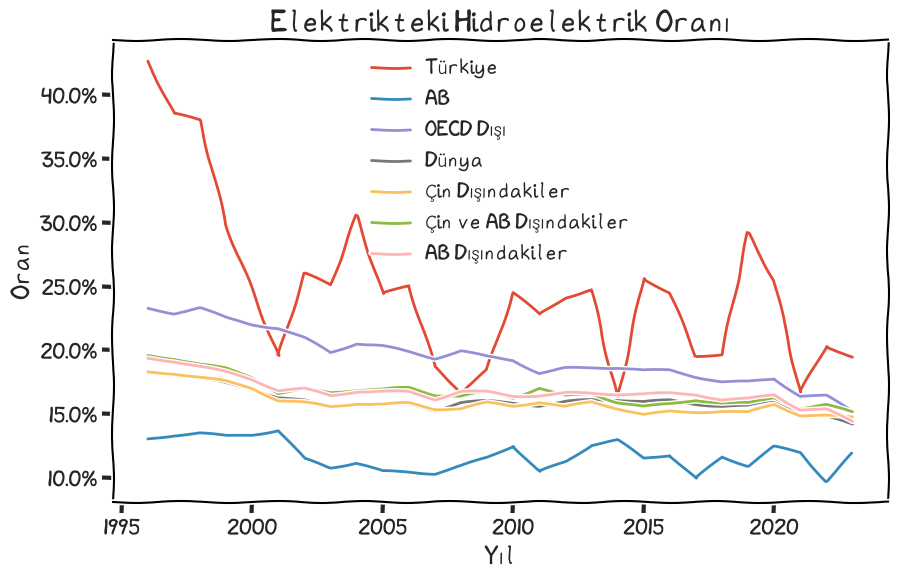

In [32]:
#elektrikteki güneş oranı
t=10 #wind
t2=4 #elect_twh
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,2,3,5,7,8,9] ]

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikteki Hidroelektrik Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in s_liste:
  print(i, (100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

wind_twh
Turkiye 10.385597847142177
Total EU 17.553066795911572
Total Non-OECD 6.2729342842312805
Total OECD 10.281899388992558
China 9.367901662782188
Dünya_Çin 7.032510606353278
Dünya_Çin_AB 5.408393103000033
nonEU 6.78560119003427


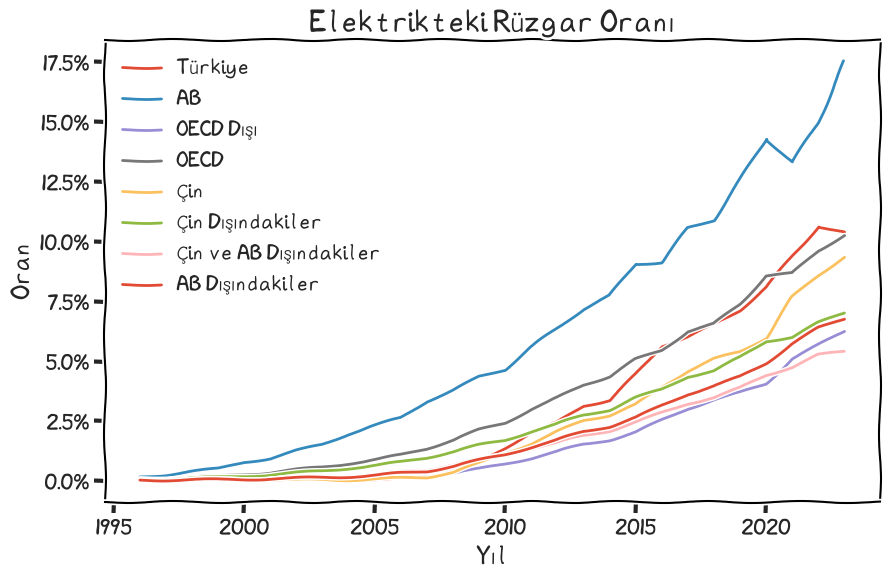

In [33]:
#elektrikteki güneş oranı
t=8 #wind
t2=4 #elect_twh
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,2,3,4,6,7,8,9] ]

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikteki Rüzgar Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in s_liste:
  print(i, (100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [34]:
liste

['Turkiye',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'China',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

elect_twh
Turkiye 16.863619066556847
Total Non-OECD 17.31603998758153
Total OECD 17.504803862319886
China 19.93870048551864
Dünya_Çin 16.41516144319276
Dünya_Çin_AB 16.262638413203607


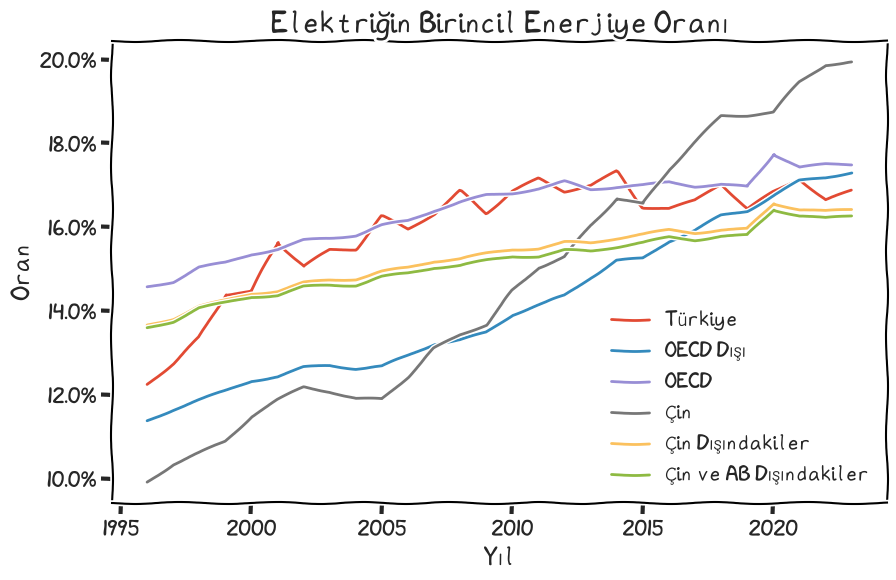

In [35]:
#elektriğin birincil enerjideki oranı
t=4 #elect_twh
t2=2 #primary_ej
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,3,4,6,7,8] ]
#s_liste=liste
#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(0.36*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektriğin Birincil Enerjiye Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in s_liste:
  print(i, (0.36*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [36]:
df.Var.unique()

array(['biodiesel_cons_kboed', 'biodiesel_cons_pj',
       'biodiesel_prod_kboed', 'biodiesel_prod_pj', 'biofuels_cons_ej',
       'biofuels_cons_kbd', 'biofuels_cons_kboed', 'biofuels_cons_pj',
       'biofuels_prod_kbd', 'biofuels_prod_kboed', 'biofuels_prod_pj',
       'biogeo_ej', 'biogeo_twh', 'biogeo_twh_net', 'co2_combust_mtco2',
       'co2_combust_pc', 'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej',
       'coalprod_ej', 'coalprod_mt', 'cobalt_kt', 'cobaltres_kt',
       'diesel_gasoil_cons_kbd', 'elect_twh', 'electbyfuel_coal',
       'electbyfuel_gas', 'electbyfuel_hydro', 'electbyfuel_nuclear',
       'electbyfuel_oil', 'electbyfuel_other', 'electbyfuel_ren_power',
       'electbyfuel_total', 'ethanol_cons_kboed', 'ethanol_cons_pj',
       'ethanol_prod_kboed', 'ethanol_prod_pj', 'fuel_oil_cons_kbd',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'gasflared_bcm',
       'gasflared_mtco2', 'gasoline_cons_kbd', 'gasprod_bcfd',
       'gasprod_bcm', 'gasprod_ej', 'graph

# Kömür

In [37]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

coalcons_ej
Turkiye 0.0847763467250782
Total EU 0.0350109349383564
Total Non-OECD 0.12828886643279008
Total OECD 0.03938236150327117
China 0.1938507199818041


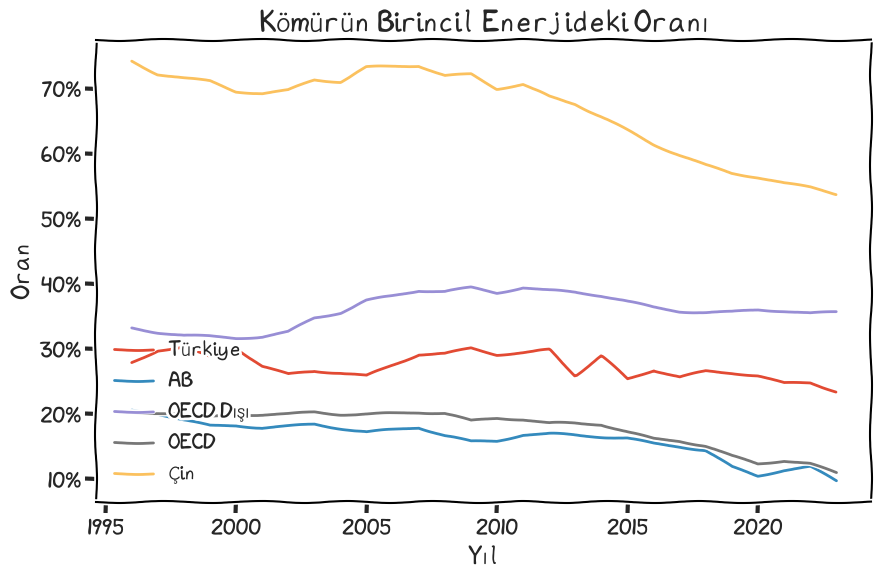

In [38]:
#elektriğin birincil enerjideki oranı
t=11 #coal_ej
t2=2 #primary_ej
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,2,3,4,6] ]
s_liste=s_liste
#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Kömürün Birincil Enerjideki Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc="lower left")

for i in s_liste:
  print(i, (0.36*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [39]:
liste

['Turkiye',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'China',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

# Gaz

gascons_ej
Turkiye 0.08962409138408117
Total EU 0.07342927200512603
Total Non-OECD 0.07492577952625834
Total OECD 0.09904832281174333
China 0.03072932845036887
Dünya_Çin 0.10409055757101404
Dünya_Çin_AB 0.10849504022268248


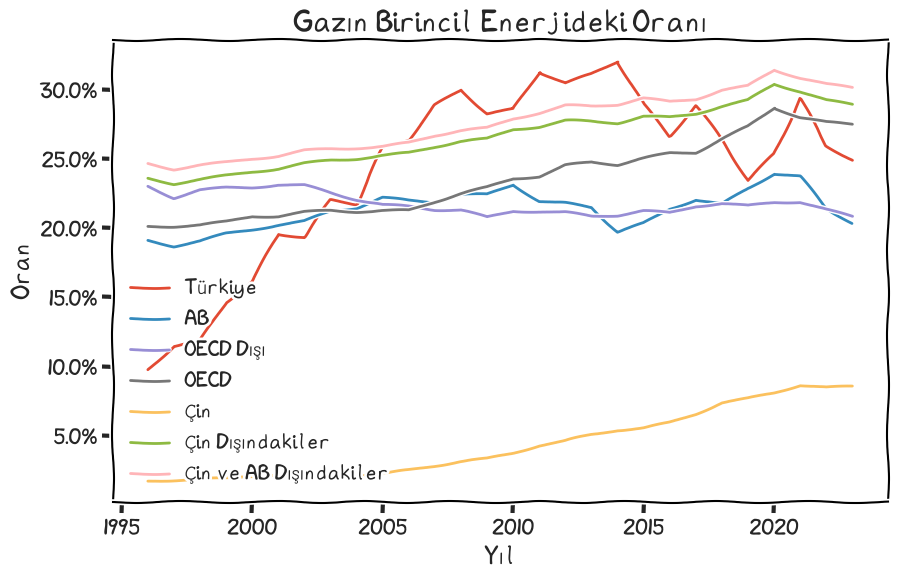

In [40]:
#elektriğin birincil enerjideki oranı
t=12 #coal_ej
t2=2 #primary_ej
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,2,3,4,6,7,8] ]
s_liste=s_liste
#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Gazın Birincil Enerjideki Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc="lower left")

for i in s_liste:
  print(i, (0.36*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [41]:
#Petrol

oilcons_ej
Turkiye 0.11827538059363467
Total EU 0.13692875431156937
Total Non-OECD 0.10094785462424666
Total OECD 0.13646277805435927
Total World 0.11412471876494398
China 0.06900172541013122


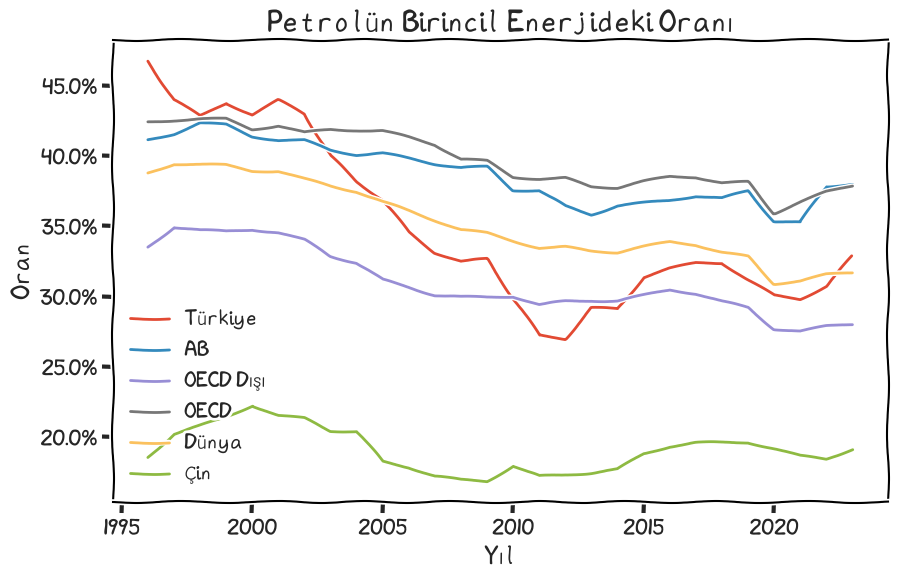

In [42]:
#elektriğin birincil enerjideki oranı
t=13 #coal_ej
t2=2 #primary_ej
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,2,3,4,5,6] ]
s_liste=s_liste
#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Petrolün Birincil Enerjideki Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc="lower left")

for i in s_liste:
  print(i, (0.36*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [43]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

electbyfuel_coal
Turkiye 0.12981333388044056
Total EU 0.04511496243848282
Total Non-OECD 0.16531855318918767
Total OECD 0.06133241580641824
China 0.21904621392828588
Dünya_Çin 0.08370499097791266
nonEU 0.13466503243241099


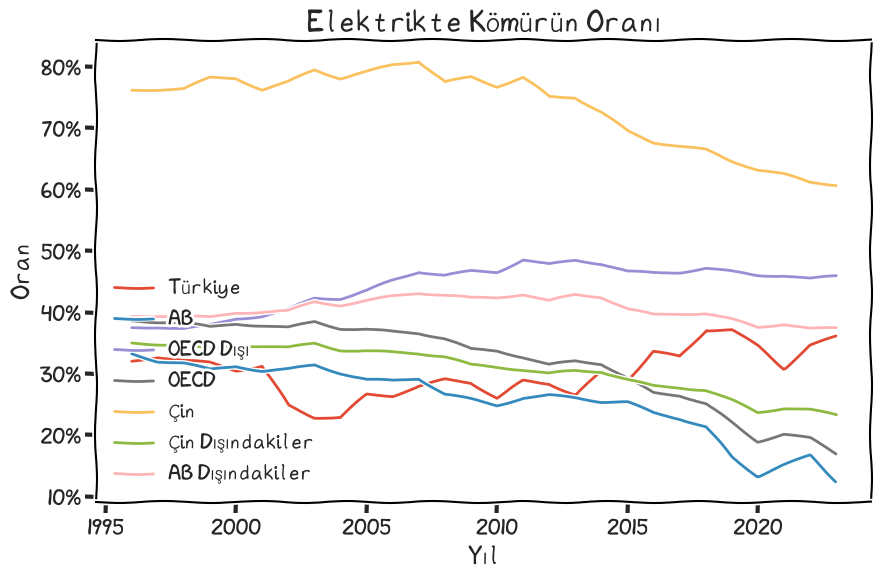

In [44]:
#elektriğin birincil enerjideki oranı
t=14 #electbyfuel_coal
t2=4 #elect_twh
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,2,3,4,6,7,9] ]
s_liste=s_liste
#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikte Kömürün Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc="lower left")

for i in s_liste:
  print(i, (0.36*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

electbyfuel_gas
Turkiye 21.24260224093632
Total EU 16.519027417574378
Total OECD 30.983360312143265
Total World 22.54429506523653
China 3.149176645756754
Dünya_Çin_AB 33.81837127768742


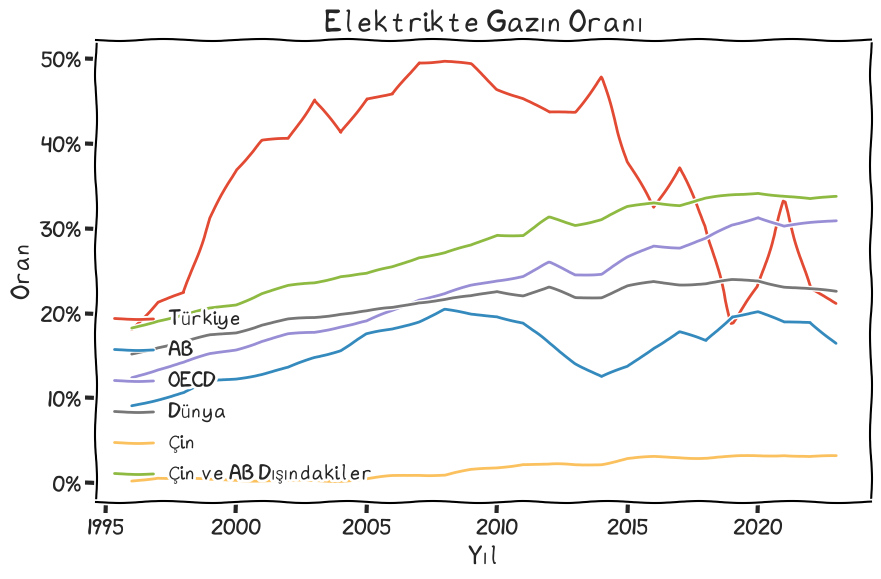

In [45]:
#elektriğin birincil enerjideki oranı
t=15 #electbyfuel_gaz
t2=4 #elect_twh
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [0,2,4,5,6,8] ]
s_liste=s_liste
#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrikte Gazın Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc="lower left")

for i in s_liste:
  print(i, (100*(dt[i,degiskenler[t]])/dt[i,degiskenler[t2]]).values[-1])

In [46]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

In [47]:
df.Var.unique()

array(['biodiesel_cons_kboed', 'biodiesel_cons_pj',
       'biodiesel_prod_kboed', 'biodiesel_prod_pj', 'biofuels_cons_ej',
       'biofuels_cons_kbd', 'biofuels_cons_kboed', 'biofuels_cons_pj',
       'biofuels_prod_kbd', 'biofuels_prod_kboed', 'biofuels_prod_pj',
       'biogeo_ej', 'biogeo_twh', 'biogeo_twh_net', 'co2_combust_mtco2',
       'co2_combust_pc', 'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej',
       'coalprod_ej', 'coalprod_mt', 'cobalt_kt', 'cobaltres_kt',
       'diesel_gasoil_cons_kbd', 'elect_twh', 'electbyfuel_coal',
       'electbyfuel_gas', 'electbyfuel_hydro', 'electbyfuel_nuclear',
       'electbyfuel_oil', 'electbyfuel_other', 'electbyfuel_ren_power',
       'electbyfuel_total', 'ethanol_cons_kboed', 'ethanol_cons_pj',
       'ethanol_prod_kboed', 'ethanol_prod_pj', 'fuel_oil_cons_kbd',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'gasflared_bcm',
       'gasflared_mtco2', 'gasoline_cons_kbd', 'gasprod_bcfd',
       'gasprod_bcm', 'gasprod_ej', 'graph

# Emisyonlar

co2_mtco2
Total EU 6.571396877687321
Total Non-OECD 70.11252757898495
Total OECD 29.887472421015058
China 31.183007377230425
Dünya_Çin 68.81699262276958
Dünya_Çin_AB 62.24559574508225
nonEU 93.42860312231268


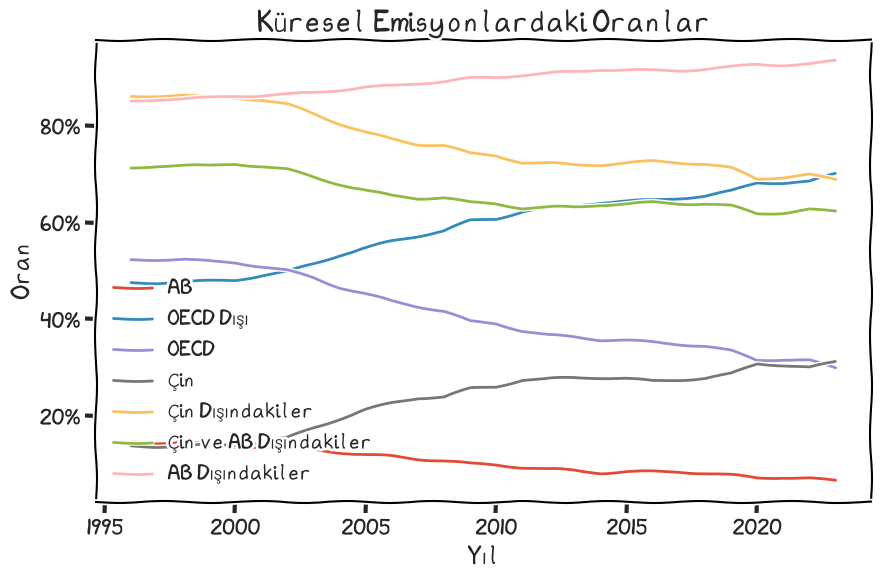

In [48]:
#elektriğin birincil enerjideki oranı
t=9 #electbyfuel_gaz
t2=9 #elect_twh
print(degiskenler[t])

#listeden ülkeler seç
s_liste=[ liste[index] for index in [2,3,4,6,7,8,9] ]
s_liste=s_liste
#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(100*(dt[i,degiskenler[t]])/dt["Total World",degiskenler[t2]],label=tercume[i])

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Küresel Emisyonlardaki Oranlar")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc="lower left")

for i in s_liste:
  print(i, (100*(dt[i,degiskenler[t]])/dt["Total World",degiskenler[t2]]).values[-1])